## Data from CDC Behavioral Risk Factor Surveillance System

The 2017 BRFSS data continues to reflect the changes initially made in 2011 in weighting methodology (raking) and the addition of cell phone only respondents. The aggregate BRFSS combined landline and cell phone dataset is built from the landline and cell phone data submitted for 2017 and includes data for 50 states, the District of Columbia, Guam, and Puerto Rico.

There are 450,016 records for 2017.

The website is: https://www.cdc.gov/brfss/annual_data/annual_2017.html

Codebook for all variables is here: https://www.cdc.gov/brfss/annual_data/2017/pdf/codebook17_llcp-v2-508.pdf

Codebook for calculated variables is here: https://www.cdc.gov/brfss/annual_data/2017/pdf/codebook17_llcp-v2-508.pdf

### Install Libraries

In [1]:
import pandas as pd
import numpy as np
!pip install saspy
import saspy
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [126]:
data = pd.read_sas(r'C:\Users\Nick\Desktop\GitProjects\LLCP2017XPT\LLCP2017.xpt', format='xport')
data.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1.0,1.0,b'01302017',b'01',b'30',b'2017',1100.0,b'2017000001',2.017000e+09,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,b'01122017',b'01',b'12',b'2017',1100.0,b'2017000002',2.017000e+09,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,b'01102017',b'01',b'10',b'2017',1100.0,b'2017000003',2.017000e+09,1.0,...,3.0,2.0,2.0,4.0,2.0,1.0,1.0,1.0,1.0,2.0
3,1.0,1.0,b'02082017',b'02',b'08',b'2017',1200.0,b'2017000004',2.017000e+09,1.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN
4,1.0,1.0,b'01302017',b'01',b'30',b'2017',1100.0,b'2017000005',2.017000e+09,1.0,...,3.0,2.0,2.0,4.0,2.0,1.0,2.0,2.0,2.0,2.0


In [127]:
data.shape

(450016, 358)

### Variables and coding info
All '.', '7', '77', '9', '99', '99900', etc refer to missing or refused values and were recoded as NaN

___STATE__ 

(US state: 1-72; MA=#25)

__SEX__

(1=male, 2=female)

Recoded: (0=female, 1=male)

___AGE_G__

(1=18-24, 2=25-34, 3=35-44, 4=45-54, 5=55-64, 6=65+)

___BMI5CAT__

(1= underweight, 2=normal weight, 3=overweight, 4=obese)

Recoded: (0=normal weight, 1=under/over-weight/obese)

_Body Mass Index_


___EDUCAG__ 

(1=<HS, 2=HS, 3=Attended College/Tech school, 4=Graduated College/Tech)

Recoded: (0=<college grad, 1=college grad)

_Education level_

___INCOMG__ 

(1=<15k, 2=15-25k, 3=25-35k, 4=35-50k, 5=50k+)

_Income level_

___DRNKWEK__ 

(0=no drinks, 1-999+=number of drinks per week)

_# alcoholic drinks per week?_

__DRNK3GE5__

(0-76)

_"Considering all types of alcoholic beverages, how many times during the past 30 days did you have 5 or more drinks for men or 4 or more drinks for women on an occasion?_

___RFDRHV5__ 

(1=no, 2=yes)

Recoded:(0=no, 1=yes)

_Heavy alcohol consumption?_

___PACAT1__

(1=highly active, 2=active, 3=insufficiently active, 4=inactive)

_Physical activity level_

__PA1MIN___

(0-99999)

_"Minutes of total physical activity per week?"_

__EXERANY2__

(1=Yes, 2=No, 7=dont' know, 9=refused)

Recoded: (0=no, 1=yes)

_"During the past month, other than your regular job, did you participate in any physical activities or exercises such as running, calisthenics, golf, gardening, or walking for exercise?_

___RFHLTH__

(1=good or better, 2=fair or poor)

Recoded: (0=poor health, 1=good health)

_General health status?_

___VEGESU1__

(1-99998)

_"Total vegetables consumed each day?"_

__ADSLEEP__

(0-14)

_"Over the last 2 weeks, how many days have you had trouble falling asleep or staying asleep or sleeping too much?"_

___HCVU651__

(1=have, 2=don't have)

Recoded: (0=don't have, 1=have)

_"Do you have access to healthcare?"_

__EMPLOY1__

(1=Employed, 2=Self-Employed, 3=Unemployed 1+yrs, 4=Unemployed <1yr, 5=Homemaker, 6=Student, 7=Retired, 8=Unable to work)

Recoded: (0=unemployed/homemaker/retired, 1=employed/student)

_Employment_

__VETERAN3__

(1=Yes, 2=No)

Recoded: (0=no, 1=yes)

_"Have you ever served on active duty in the United States Armed Forces, either in the regular military or in a National Guard or military reserve unit?"_

__MARITAL__

(1=Married, 2=Divorced, 3=Widowed, 4=Separated, 5=Never Married, 6=Coupled, not married, 9=Refused)

Recoded: (0=unmarried, 1=married))

_"What is your marital status?"_

__MARIJANA__

(0-30)

_"During the past  30  days, on how many days did you use marijuana or hashish?_

__ADDEPEV2__

(1=yes, 2=no)

Recoded: (0=no, 1=yes)

_"(Ever told) you have a depressive disorder (including depression, major depression, dysthymia, or minor depression)?"_

__CIMEMLOS__

(1=Yes, 2=No)

Recoded: (0=no, 1=yes)

_"During the past 12 months, have you experienced confusion or memory loss that is happening more often or is getting worse?"_

__LSATISFY__

(1=Very Satisfied, 2=Satisfied, 3=Disatisfied, 4=Very Disatisfied)

Recoded: (0=disatisfied, 1=satisfied)

_"In general, how satisfied are you with your life?

__FIREARM4__

(1=Yes, 2=No)

Recoded(0=no, 1=yes)

_"Are any firearms kept in or around your home?"_

__POORHLTH__

(1-30 days not good, 77=Unsure, 88=no days bad, 99=missing)

_"During the past 30 days, for about how many days did poor physical or mental health keep you from doing your usual activities, such as self-care, work, or recreation?"

__PHYSHLTH__

(1-30 days not good, 77=Unsure, 88=no days bad, 99=missing)

_"Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?"_

__MENTHLTH__

(1-30 days not good, 77=Unsure, 88=no days bad, 99=missing)

_"Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good?"_

### Create subset including only the variables listed above:

In [128]:
LLCP=data[['_STATE','SEX', '_AGE_G', '_BMI5CAT', '_EDUCAG', '_INCOMG', '_DRNKWEK', 'DRNK3GE5', 
           '_RFDRHV5', '_PACAT1', 'PA1MIN_', 'EXERANY2', '_RFHLTH', '_VEGESU1', 'ADSLEEP', '_HCVU651', 
           'EMPLOY1', 'VETERAN3', 'MARITAL', 'MARIJANA', 'ADDEPEV2', 'CIMEMLOS', 'LSATISFY', 'FIREARM4',
           'POORHLTH', 'PHYSHLTH', 'MENTHLTH']]

LLCP.head(20)

,_STATE,SEX,_AGE_G,_BMI5CAT,_EDUCAG,_INCOMG,_DRNKWEK,DRNK3GE5,_RFDRHV5,_PACAT1,...,VETERAN3,MARITAL,MARIJANA,ADDEPEV2,CIMEMLOS,LSATISFY,FIREARM4,POORHLTH,PHYSHLTH,MENTHLTH
0,1.0,2.0,6.0,3.0,4.0,4.0,5.397605e-79,NaN,1.0,1.0,...,1.0,3.0,NaN,2.0,NaN,NaN,NaN,NaN,88.0,88.0
1,1.0,1.0,6.0,3.0,4.0,5.0,5.397605e-79,NaN,1.0,1.0,...,2.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,88.0,88.0
2,1.0,1.0,6.0,3.0,1.0,9.0,1.000000e+02,88.0,1.0,4.0,...,2.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,88.0,88.0
3,1.0,2.0,6.0,3.0,1.0,1.0,5.397605e-79,NaN,1.0,9.0,...,2.0,3.0,NaN,1.0,NaN,NaN,NaN,NaN,88.0,88.0
4,1.0,2.0,6.0,2.0,1.0,1.0,5.397605e-79,NaN,1.0,4.0,...,2.0,3.0,NaN,2.0,NaN,NaN,NaN,14.0,14.0,88.0
5,1.0,1.0,6.0,3.0,2.0,2.0,6.000000e+02,88.0,1.0,3.0,...,1.0,3.0,NaN,2.0,NaN,NaN,NaN,88.0,6.0,88.0
6,1.0,1.0,6.0,3.0,3.0,5.0,5.397605e-79,NaN,1.0,4.0,...,2.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,88.0,88.0
7,1.0,2.0,6.0,NaN,2.0,9.0,5.397605e-79,NaN,1.0,2.0,...,2.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,88.0,88.0
8,1.0,1.0,6.0,2.0,2.0,3.0,5.397605e-79,NaN,1.0,4.0,...,1.0,1.0,NaN,1.0,NaN,NaN,NaN,88.0,88.0,25.0
9,1.0,1.0,4.0,3.0,2.0,4.0,6.000000e+02,88.0,1.0,1.0,...,2.0,2.0,NaN,2.0,NaN,NaN,NaN,88.0,2.0,1.0


In [129]:
LLCP.dtypes

_STATE      float64
SEX         float64
_AGE_G      float64
_BMI5CAT    float64
_EDUCAG     float64
_INCOMG     float64
_DRNKWEK    float64
DRNK3GE5    float64
_RFDRHV5    float64
_PACAT1     float64
PA1MIN_     float64
EXERANY2    float64
_RFHLTH     float64
_VEGESU1    float64
ADSLEEP     float64
_HCVU651    float64
EMPLOY1     float64
VETERAN3    float64
MARITAL     float64
MARIJANA    float64
ADDEPEV2    float64
CIMEMLOS    float64
LSATISFY    float64
FIREARM4    float64
POORHLTH    float64
PHYSHLTH    float64
MENTHLTH    float64
dtype: object

In [130]:
LLCP.isnull().sum()

_STATE           0
SEX              0
_AGE_G           0
_BMI5CAT     36446
_EDUCAG          0
_INCOMG          0
_DRNKWEK         0
DRNK3GE5    229909
_RFDRHV5         0
_PACAT1          0
PA1MIN_     156652
EXERANY2     33153
_RFHLTH          0
_VEGESU1     47460
ADSLEEP     400082
_HCVU651         0
EMPLOY1          6
VETERAN3        11
MARITAL          7
MARIJANA    386565
ADDEPEV2         3
CIMEMLOS    432453
LSATISFY    430424
FIREARM4    432191
POORHLTH    212699
PHYSHLTH         1
MENTHLTH         1
dtype: int64

In [204]:
LLCP.describe()

,_STATE,SEX,_AGE_G,_BMI5CAT,_EDUCAG,_INCOMG,_DRNKWEK,DRNK3GE5,_RFDRHV5,_PACAT1,...,MARITAL,MARIJANA,ADDEPEV2,CIMEMLOS,LSATISFY,FIREARM4,POORHLTH,PHYSHLTH,MENTHLTH,MENTHLTH2
count,450016.000000,449732.000000,450016.000000,413570.000000,448309.000000,374931.000000,4.199500e+05,217222.000000,419836.000000,397335.000000,...,446870.000000,62969.000000,447892.000000,17435.000000,19492.000000,16691.000000,232518.000000,440685.000000,442813.000000,442813.000000
mean,28.816780,0.441874,4.416081,0.688430,0.375611,3.748460,2.840325e+02,1.138724,0.058258,2.457981,...,0.521161,0.858200,0.199175,0.103355,0.975631,0.454616,5.351973,4.412914,3.595398,0.322211
std,15.813072,0.496610,1.583006,0.463136,0.484281,1.447313,9.016715e+02,3.762771,0.234232,1.233341,...,0.499553,4.529868,0.399381,0.304431,0.460620,0.497951,9.382512,8.895486,7.910237,0.467324
min,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,5.397605e-79,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,3.000000,0.000000,0.000000,2.000000,5.397605e-79,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,5.000000,1.000000,0.000000,4.000000,2.300000e+01,0.000000,0.000000,2.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,41.000000,1.000000,6.000000,1.000000,1.000000,5.000000,2.330000e+02,1.000000,0.000000,4.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,5.000000,3.000000,2.000000,1.000000
max,72.000000,1.000000,6.000000,1.000000,1.000000,5.000000,5.320000e+04,76.000000,1.000000,4.000000,...,1.000000,30.000000,1.000000,1.000000,9.000000,1.000000,30.000000,30.000000,30.000000,1.000000


### Replace all "don't know/refused/missing" values with NaN

In [132]:
LLCP['SEX'].replace(2, 0, inplace=True)
LLCP['SEX'].replace(9, np.nan, inplace=True)

In [133]:
LLCP['_BMI5CAT'].replace('.', np.nan, inplace=True)
LLCP['_BMI5CAT'].replace(3, 1, inplace=True)
LLCP['_BMI5CAT'].replace(4, 1, inplace=True)
LLCP['_BMI5CAT'].replace(2, 0, inplace=True)

In [134]:
LLCP['_EDUCAG'].replace(9, np.nan, inplace=True)
LLCP['_EDUCAG'].replace(1, 0, inplace=True)
LLCP['_EDUCAG'].replace(2, 0, inplace=True)
LLCP['_EDUCAG'].replace(3, 0, inplace=True)
LLCP['_EDUCAG'].replace(4, 1, inplace=True)

In [135]:
LLCP['_INCOMG'].replace(9, np.nan, inplace=True)

In [136]:
LLCP['_DRNKWEK'].replace(99900, np.nan, inplace=True)

In [137]:
LLCP['DRNK3GE5'].replace(88, 0, inplace=True)
LLCP['DRNK3GE5'].replace(77, np.nan, inplace=True)
LLCP['DRNK3GE5'].replace(99, np.nan, inplace=True)

In [138]:
LLCP['_RFDRHV5'].replace(9, np.nan, inplace=True)
LLCP['_RFDRHV5'].replace(1, 0, inplace=True)
LLCP['_RFDRHV5'].replace(2, 1, inplace=True)

In [139]:
LLCP['_PACAT1'].replace(9, np.nan, inplace=True)

In [140]:
LLCP['EXERANY2'].replace(7, np.nan, inplace=True)
LLCP['EXERANY2'].replace(9, np.nan, inplace=True)
LLCP['EXERANY2'].replace(2, 0, inplace=True)

In [141]:
LLCP['_RFHLTH'].replace(9, np.nan, inplace=True)
LLCP['_RFHLTH'].replace(2, 0, inplace=True)

In [142]:
LLCP['ADSLEEP'].replace(88, 0, inplace=True)
LLCP['ADSLEEP'].replace(77, np.nan, inplace=True)
LLCP['ADSLEEP'].replace(99, np.nan, inplace=True)

In [143]:
LLCP['_HCVU651'].replace(9, np.nan, inplace=True)
LLCP['_HCVU651'].replace(2, 0, inplace=True)

In [144]:
LLCP['EMPLOY1'].replace(9, np.nan, inplace=True)
LLCP['EMPLOY1'].replace(2, 1, inplace=True)
LLCP['EMPLOY1'].replace(6, 1, inplace=True)
LLCP['EMPLOY1'].replace(3, 0, inplace=True)
LLCP['EMPLOY1'].replace(4, 0, inplace=True)
LLCP['EMPLOY1'].replace(5, 0, inplace=True)
LLCP['EMPLOY1'].replace(7, 0, inplace=True)
LLCP['EMPLOY1'].replace(8, 0, inplace=True)

In [145]:
LLCP['VETERAN3'].replace(7, np.nan, inplace=True)
LLCP['VETERAN3'].replace(9, np.nan, inplace=True)
LLCP['VETERAN3'].replace(2, 0, inplace=True)

In [146]:
LLCP['MARITAL'].replace(9, np.nan, inplace=True)
LLCP['MARITAL'].replace(2, 0, inplace=True)
LLCP['MARITAL'].replace(3, 0, inplace=True)
LLCP['MARITAL'].replace(4, 0, inplace=True)
LLCP['MARITAL'].replace(5, 0, inplace=True)
LLCP['MARITAL'].replace(6, 0, inplace=True)

In [147]:
LLCP['MARIJANA'].replace(88, 0, inplace=True)
LLCP['MARIJANA'].replace(77, np.nan, inplace=True)
LLCP['MARIJANA'].replace(99, np.nan, inplace=True)

In [148]:
LLCP['ADDEPEV2'].replace(2, 0, inplace=True)
LLCP['ADDEPEV2'].replace(7, np.nan, inplace=True)
LLCP['ADDEPEV2'].replace(9, np.nan, inplace=True)

In [149]:
LLCP['CIMEMLOS'].replace(7, np.nan, inplace=True)
LLCP['CIMEMLOS'].replace(9, np.nan, inplace=True)
LLCP['CIMEMLOS'].replace(2, 0, inplace=True)

In [150]:
LLCP['LSATISFY'].replace(7, np.nan, inplace=True)
LLCP['LSATISFY'].replace(2, 1, inplace=True)
LLCP['LSATISFY'].replace(3, 0, inplace=True)
LLCP['LSATISFY'].replace(4, 0, inplace=True)


In [151]:
LLCP['FIREARM4'].replace(7, np.nan, inplace=True)
LLCP['FIREARM4'].replace(9, np.nan, inplace=True)
LLCP['FIREARM4'].replace(2, 0, inplace=True)

In [152]:
LLCP['POORHLTH'].replace(88, 0, inplace=True)
LLCP['POORHLTH'].replace(77, np.nan, inplace=True)
LLCP['POORHLTH'].replace(99, np.nan, inplace=True)

In [153]:
LLCP['PHYSHLTH'].replace(88, 0, inplace=True)
LLCP['PHYSHLTH'].replace(77, np.nan, inplace=True)
LLCP['PHYSHLTH'].replace(99, np.nan, inplace=True)

In [154]:
LLCP['MENTHLTH'].replace(88, 0, inplace=True)
LLCP['MENTHLTH'].replace(77, np.nan, inplace=True)
LLCP['MENTHLTH'].replace(99, np.nan, inplace=True)

In [202]:
LLCP['MENTHLTH2']=LLCP['MENTHLTH']

LLCP.loc[LLCP['MENTHLTH2'] < 1, 'MENTHLTH2'] = 0
LLCP.loc[LLCP['MENTHLTH2'] > 0, 'MENTHLTH2'] = 1

C:\Users\Nick\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Nick\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Nick\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
 

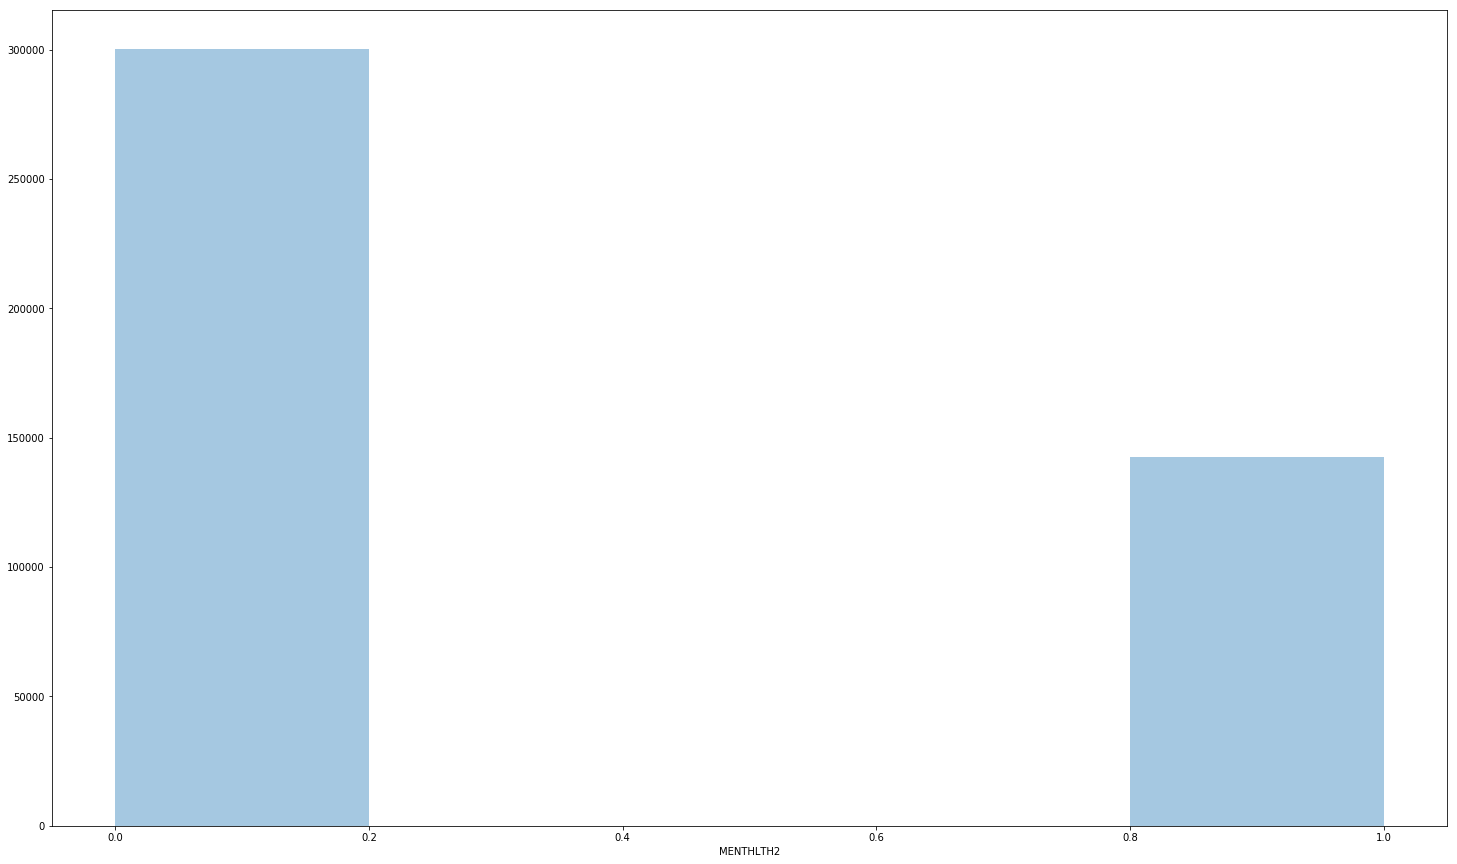

In [203]:
sns.distplot(LLCP['MENTHLTH2'], kde=False, bins=5);

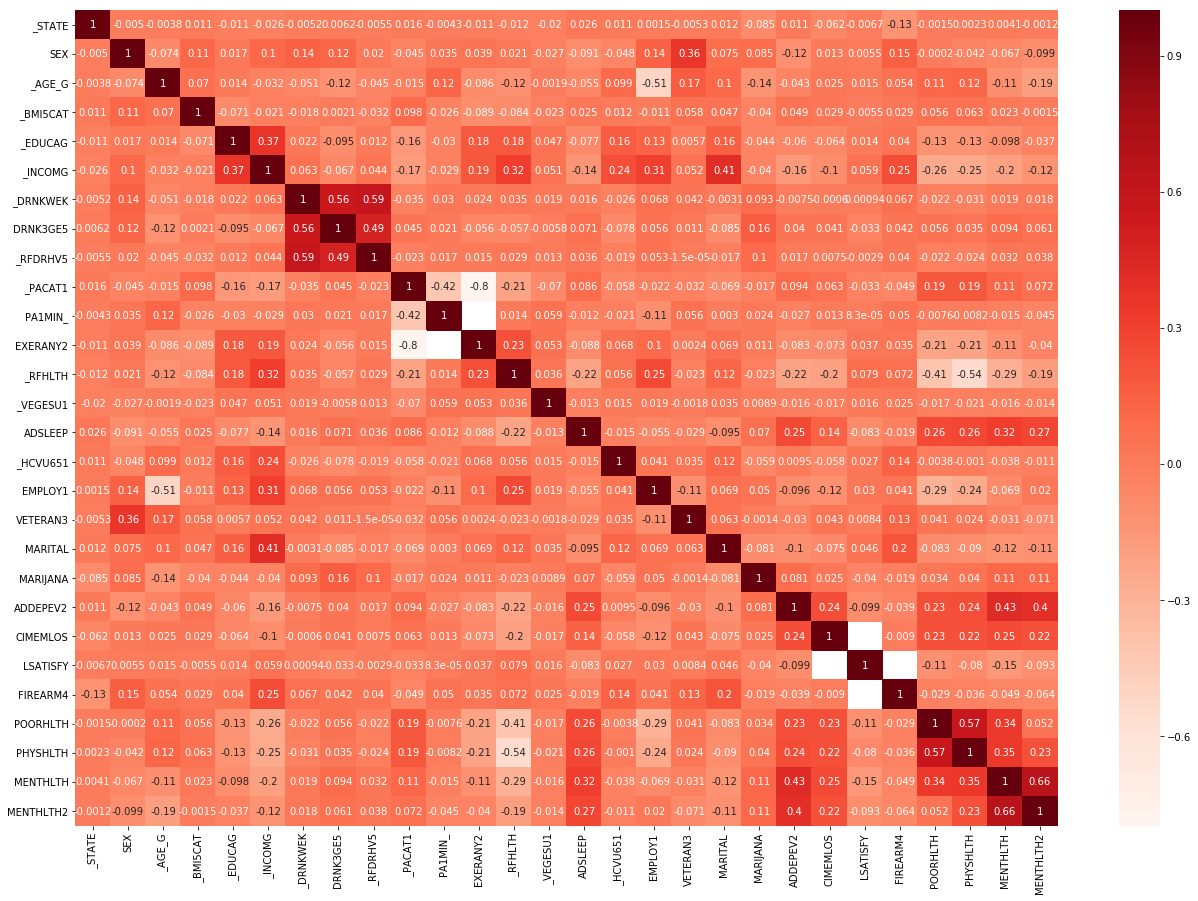

In [205]:
#Using Pearson Correlation

plt.figure(figsize=(22,15))
cor = LLCP.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [158]:
#Correlation with output variable

cor_target = abs(cor["MENTHLTH"])   #Selecting highly correlated features
relevant_features = cor_target[cor_target>0.15]
relevant_features

_INCOMG     0.198435
_RFHLTH     0.288192
ADSLEEP     0.316372
ADDEPEV2    0.431397
CIMEMLOS    0.249232
LSATISFY    0.153255
POORHLTH    0.337791
PHYSHLTH    0.345136
MENTHLTH    1.000000
Name: MENTHLTH, dtype: float64

In [40]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
%matplotlib inline
!pip install missingno
import missingno as msno

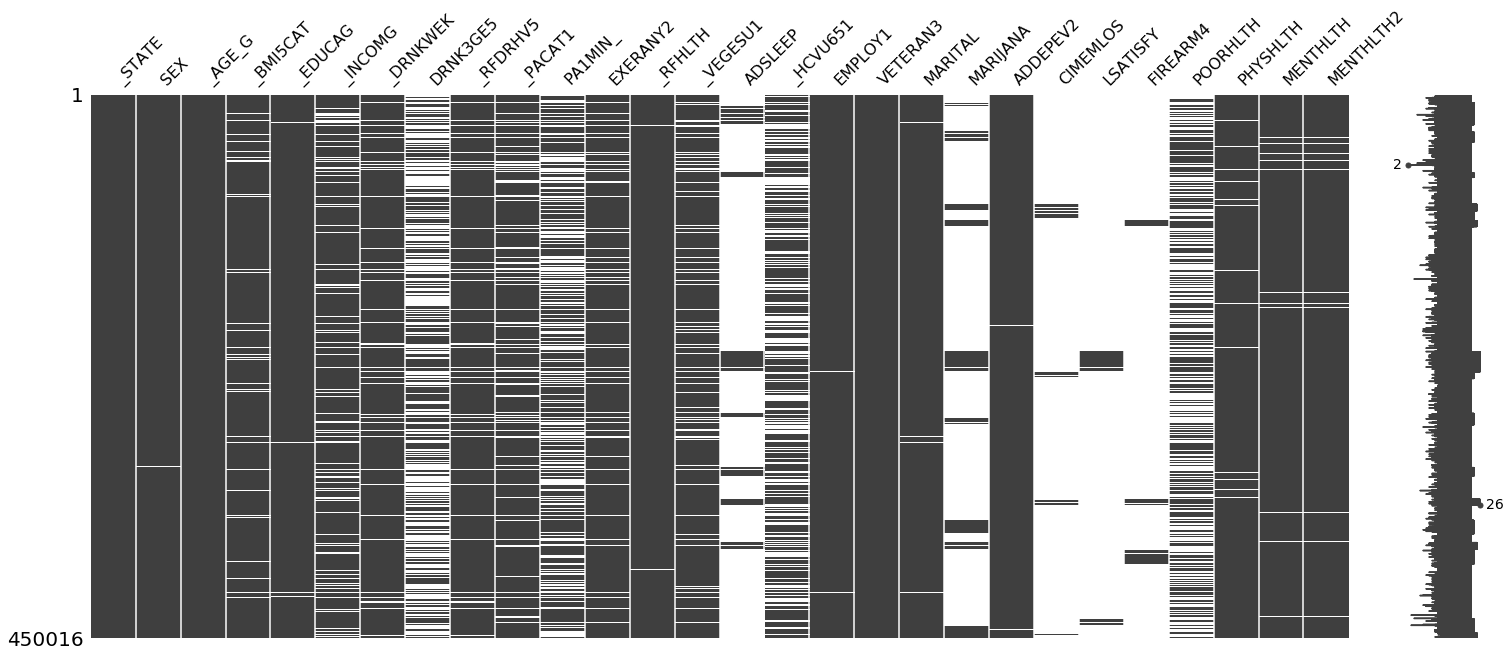

In [206]:
msno.matrix(LLCP)

In [207]:
LLCP2 = LLCP[['SEX','_AGE_G','_BMI5CAT','_EDUCAG','_INCOMG','_DRNKWEK','_RFDRHV5','_PACAT1','PA1MIN_','EXERANY2','_RFHLTH','_VEGESU1','_HCVU651','EMPLOY1','VETERAN3','MARITAL','ADDEPEV2','POORHLTH','PHYSHLTH','MENTHLTH','MENTHLTH2']]
LLCP2.isnull().sum()

SEX             284
_AGE_G            0
_BMI5CAT      36446
_EDUCAG        1707
_INCOMG       75085
_DRNKWEK      30066
_RFDRHV5      30180
_PACAT1       52681
PA1MIN_      156652
EXERANY2      34203
_RFHLTH        1149
_VEGESU1      47460
_HCVU651     163884
EMPLOY1        3706
VETERAN3        740
MARITAL        3146
ADDEPEV2       2124
POORHLTH     217498
PHYSHLTH       9331
MENTHLTH       7203
MENTHLTH2      7203
dtype: int64

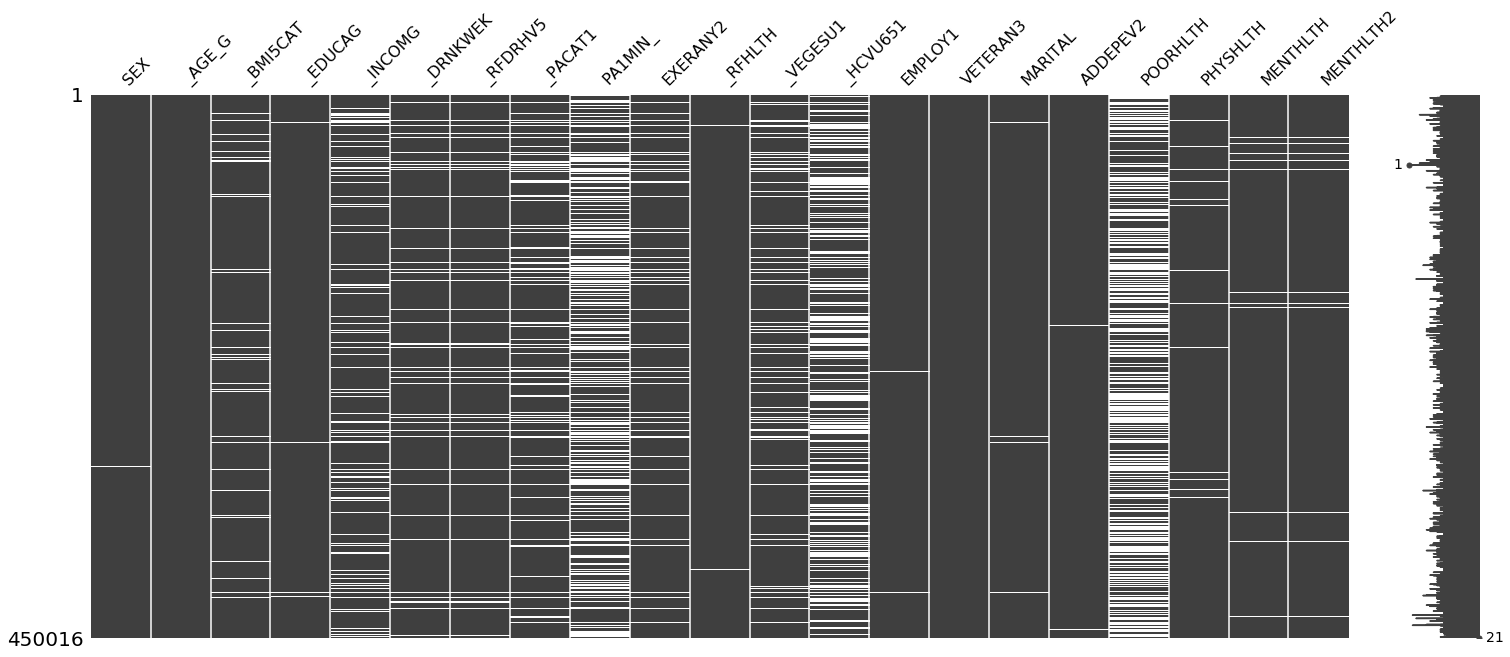

In [208]:
msno.matrix(LLCP2)

In [209]:
LLCP2.describe()

,SEX,_AGE_G,_BMI5CAT,_EDUCAG,_INCOMG,_DRNKWEK,_RFDRHV5,_PACAT1,PA1MIN_,EXERANY2,...,_VEGESU1,_HCVU651,EMPLOY1,VETERAN3,MARITAL,ADDEPEV2,POORHLTH,PHYSHLTH,MENTHLTH,MENTHLTH2
count,449732.000000,450016.000000,413570.000000,448309.000000,374931.000000,4.199500e+05,419836.000000,397335.000000,2.933640e+05,415813.000000,...,4.025560e+05,286132.000000,446310.000000,449276.000000,446870.000000,447892.000000,232518.000000,440685.000000,442813.000000,442813.000000
mean,0.441874,4.416081,0.688430,0.375611,3.748460,2.840325e+02,0.058258,2.457981,4.898493e+02,0.723955,...,2.083922e+02,0.885186,0.528480,0.128803,0.521161,0.199175,5.351973,4.412914,3.595398,0.322211
std,0.496610,1.583006,0.463136,0.484281,1.447313,9.016715e+02,0.234232,1.233341,8.504535e+02,0.447040,...,3.145890e+02,0.318798,0.499189,0.334982,0.499553,0.399381,9.382512,8.895486,7.910237,0.467324
min,0.000000,1.000000,0.000000,0.000000,1.000000,5.397605e-79,0.000000,1.000000,5.397605e-79,0.000000,...,5.397605e-79,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,0.000000,0.000000,2.000000,5.397605e-79,0.000000,1.000000,1.200000e+02,0.000000,...,1.190000e+02,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.000000,1.000000,0.000000,4.000000,2.300000e+01,0.000000,2.000000,2.700000e+02,1.000000,...,1.720000e+02,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,6.000000,1.000000,1.000000,5.000000,2.330000e+02,0.000000,4.000000,5.500000e+02,1.000000,...,2.430000e+02,1.000000,1.000000,0.000000,1.000000,0.000000,5.000000,3.000000,2.000000,1.000000
max,1.000000,6.000000,1.000000,1.000000,5.000000,5.320000e+04,1.000000,4.000000,8.999000e+04,1.000000,...,2.970700e+04,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000,30.000000,30.000000,1.000000


In [210]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values=np.nan, strategy='median', axis=0)
LLCP2[['SEX','_BMI5CAT','_EDUCAG','_INCOMG','_DRNKWEK','_RFDRHV5','_PACAT1','PA1MIN_','EXERANY2','_RFHLTH','_VEGESU1','_HCVU651','EMPLOY1','VETERAN3','MARITAL','ADDEPEV2','POORHLTH','PHYSHLTH','MENTHLTH','MENTHLTH2']]=imputer.fit_transform(LLCP2[['SEX','_BMI5CAT','_EDUCAG','_INCOMG','_DRNKWEK','_RFDRHV5','_PACAT1','PA1MIN_','EXERANY2','_RFHLTH','_VEGESU1','_HCVU651','EMPLOY1','VETERAN3','MARITAL','ADDEPEV2','POORHLTH','PHYSHLTH','MENTHLTH','MENTHLTH2']])

C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Nick\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Nick\Anaconda3\lib\site-packages\pandas\core\frame.py:3395: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  sel

In [211]:
LLCP2.describe()

,SEX,_AGE_G,_BMI5CAT,_EDUCAG,_INCOMG,_DRNKWEK,_RFDRHV5,_PACAT1,PA1MIN_,EXERANY2,...,_VEGESU1,_HCVU651,EMPLOY1,VETERAN3,MARITAL,ADDEPEV2,POORHLTH,PHYSHLTH,MENTHLTH,MENTHLTH2
count,450016.000000,450016.000000,450016.000000,450016.000000,450016.000000,4.500160e+05,450016.000000,450016.000000,4.500160e+05,450016.000000,...,4.500160e+05,450016.000000,450016.000000,450016.000000,450016.000000,450016.000000,450016.000000,450016.000000,450016.000000,450016.000000
mean,0.441595,4.416081,0.713664,0.374187,3.790430,2.665926e+02,0.054351,2.404368,4.133191e+02,0.744936,...,2.045541e+02,0.926998,0.532363,0.128591,0.524508,0.198235,2.765302,4.321413,3.537850,0.317053
std,0.496578,1.583006,0.452049,0.483913,1.324389,8.734652e+02,0.226710,1.168220,6.945976e+02,0.435898,...,2.977480e+02,0.260140,0.498952,0.334747,0.499400,0.398671,7.255185,8.825211,7.859638,0.465329
min,0.000000,1.000000,0.000000,0.000000,1.000000,5.397605e-79,0.000000,1.000000,5.397605e-79,0.000000,...,5.397605e-79,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,0.000000,0.000000,3.000000,5.397605e-79,0.000000,1.000000,1.960000e+02,0.000000,...,1.280000e+02,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.000000,1.000000,0.000000,4.000000,2.300000e+01,0.000000,2.000000,2.700000e+02,1.000000,...,1.720000e+02,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,6.000000,1.000000,1.000000,5.000000,2.000000e+02,0.000000,4.000000,3.640000e+02,1.000000,...,2.290000e+02,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,3.000000,2.000000,1.000000
max,1.000000,6.000000,1.000000,1.000000,5.000000,5.320000e+04,1.000000,4.000000,8.999000e+04,1.000000,...,2.970700e+04,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000,30.000000,30.000000,1.000000


In [212]:
LLCP2.shape

(450016, 21)

In [213]:
LLCP2[['SEX','_BMI5CAT','_EDUCAG','_INCOMG','_DRNKWEK','_RFDRHV5','_PACAT1','PA1MIN_',
       'EXERANY2','_RFHLTH','_VEGESU1','_HCVU651','EMPLOY1','VETERAN3','MARITAL','ADDEPEV2','POORHLTH',
       'PHYSHLTH','MENTHLTH', 'MENTHLTH2']].corr() 

,SEX,_BMI5CAT,_EDUCAG,_INCOMG,_DRNKWEK,_RFDRHV5,_PACAT1,PA1MIN_,EXERANY2,_RFHLTH,_VEGESU1,_HCVU651,EMPLOY1,VETERAN3,MARITAL,ADDEPEV2,POORHLTH,PHYSHLTH,MENTHLTH,MENTHLTH2
SEX,1.000000,0.085531,0.017429,0.090012,0.133388,0.017686,-0.041937,0.032765,0.038740,0.021441,-0.026170,-0.050380,0.136710,0.358836,0.074043,-0.115785,-0.032914,-0.040716,-0.065749,-0.097171
_BMI5CAT,0.085531,1.000000,-0.071634,-0.024695,-0.027242,-0.038042,0.092078,-0.038055,-0.078958,-0.078816,-0.022263,-0.000883,-0.009062,0.044476,0.046815,0.040613,0.040594,0.055865,0.017916,-0.007118
_EDUCAG,0.017429,-0.071634,1.000000,0.337425,0.024912,0.014782,-0.141802,0.001704,0.164491,0.180333,0.047253,0.123050,0.130305,0.005906,0.155159,-0.059076,-0.100515,-0.120122,-0.094640,-0.032463
_INCOMG,0.090012,-0.024695,0.337425,1.000000,0.056157,0.039942,-0.142223,0.004279,0.159877,0.282103,0.045709,0.154340,0.272339,0.046045,0.370661,-0.147633,-0.209355,-0.216715,-0.176903,-0.110451
_DRNKWEK,0.133388,-0.027242,0.024912,0.056157,1.000000,0.590760,-0.027317,0.028445,0.015596,0.034219,0.019787,-0.028009,0.063329,0.040505,-0.002263,-0.005075,-0.015495,-0.027797,0.018667,0.019311
_RFDRHV5,0.017686,-0.038042,0.014782,0.039942,0.590760,1.000000,-0.017791,0.018587,0.008446,0.028255,0.014454,-0.022699,0.049424,0.000404,-0.015308,0.018252,-0.009279,-0.021027,0.031309,0.038046
_PACAT1,-0.041937,0.092078,-0.141802,-0.142223,-0.027317,-0.017791,1.000000,-0.351318,-0.799234,-0.193492,-0.063716,-0.041370,-0.019413,-0.028588,-0.062263,0.091879,0.158596,0.172062,0.104441,0.067686
PA1MIN_,0.032765,-0.038055,0.001704,0.004279,0.028445,0.018587,-0.351318,1.000000,0.120736,0.039124,0.056519,0.013355,-0.072517,0.046093,0.011453,-0.028847,-0.034667,-0.030963,-0.023776,-0.037666
EXERANY2,0.038740,-0.078958,0.164491,0.159877,0.015596,0.008446,-0.799234,0.120736,1.000000,0.211515,0.046987,0.030995,0.098608,0.000366,0.063939,-0.083193,-0.170822,-0.191357,-0.100746,-0.038275
_RFHLTH,0.021441,-0.078816,0.180333,0.282103,0.034219,0.028255,-0.193492,0.039124,0.211515,1.000000,0.035224,0.026729,0.246907,-0.022841,0.117071,-0.219051,-0.422461,-0.520753,-0.279491,-0.183585


In [166]:
from scipy import stats

pearson_coef, p_value = stats.pearsonr(LLCP2["SEX"], LLCP2["MENTHLTH"])
print("Pearson Corr for SEX and MENTHLTH is", pearson_coef, " with p =", p_value) 

pearson_coef, p_value = stats.pearsonr(LLCP2["_AGE_G"], LLCP2["MENTHLTH"])
print("Pearson Corr for _AGE_G and MENTHLTH is", pearson_coef, " with p =", p_value) 

pearson_coef, p_value = stats.pearsonr(LLCP2["_BMI5CAT"], LLCP2["MENTHLTH"])
print("Pearson Corr for _BMI5CAT and MENTHLTH is", pearson_coef, " with p =", p_value)  

pearson_coef, p_value = stats.pearsonr(LLCP2["_EDUCAG"], LLCP2["MENTHLTH"])
print("Pearson Corr for _EDUCAG and MENTHLTH is", pearson_coef, " with p =", p_value) 

pearson_coef, p_value = stats.pearsonr(LLCP2["_INCOMG"], LLCP2["MENTHLTH"])
print("Pearson Corr _INCOMG and MENTHLTH is", pearson_coef, " with p =", p_value) 

pearson_coef, p_value = stats.pearsonr(LLCP2["_DRNKWEK"], LLCP2["MENTHLTH"])
print("Pearson Corr for _DRNKWEK and MENTHLTH is", pearson_coef, " with p =", p_value) 

pearson_coef, p_value = stats.pearsonr(LLCP2["_RFDRHV5"], LLCP2["MENTHLTH"])
print("Pearson Corr for _RFDRHV5 and MENTHLTH is", pearson_coef, " with p =", p_value) 

pearson_coef, p_value = stats.pearsonr(LLCP2["_PACAT1"], LLCP2["MENTHLTH"])
print("Pearson Corr for _PACAT1 and MENTHLTH is", pearson_coef, " with p =", p_value) 

pearson_coef, p_value = stats.pearsonr(LLCP2["PA1MIN_"], LLCP2["MENTHLTH"])
print("Pearson Corr for PA1MIN_ and MENTHLTH is", pearson_coef, " with p =", p_value)

pearson_coef, p_value = stats.pearsonr(LLCP2["EXERANY2"], LLCP2["MENTHLTH"])
print("Pearson Corr for EXERANY2 and MENTHLTH is", pearson_coef, " with p =", p_value)

pearson_coef, p_value = stats.pearsonr(LLCP2["_RFHLTH"], LLCP2["MENTHLTH"])
print("Pearson Corr for _RFHLTH and MENTHLTH is", pearson_coef, " with p =", p_value)

pearson_coef, p_value = stats.pearsonr(LLCP2["_VEGESU1"], LLCP2["MENTHLTH"])
print("Pearson Corr for _VEGESU1 and MENTHLTH is", pearson_coef, " with p =", p_value)

pearson_coef, p_value = stats.pearsonr(LLCP2["_HCVU651"], LLCP2["MENTHLTH"])
print("Pearson Corr for _HCVU651 and MENTHLTH is", pearson_coef, " with p =", p_value)

pearson_coef, p_value = stats.pearsonr(LLCP2["EMPLOY1"], LLCP2["MENTHLTH"])
print("Pearson Corr for EMPLOY1 and MENTHLTH is", pearson_coef, " with p =", p_value)

pearson_coef, p_value = stats.pearsonr(LLCP2["VETERAN3"], LLCP2["MENTHLTH"])
print("Pearson Corr for VETERAN3 and MENTHLTH is", pearson_coef, " with p =", p_value)

pearson_coef, p_value = stats.pearsonr(LLCP2["MARITAL"], LLCP2["MENTHLTH"])
print("Pearson Corr for MARITAL and MENTHLTH is", pearson_coef, " with p =", p_value)

pearson_coef, p_value = stats.pearsonr(LLCP2["ADDEPEV2"], LLCP2["MENTHLTH"])
print("Pearson Corr for ADDEPEV2 and MENTHLTH is", pearson_coef, " with p =", p_value)

pearson_coef, p_value = stats.pearsonr(LLCP2["POORHLTH"], LLCP2["MENTHLTH"])
print("Pearson Corr for POORHLTH and MENTHLTH is", pearson_coef, " with p =", p_value)

pearson_coef, p_value = stats.pearsonr(LLCP2["PHYSHLTH"], LLCP2["MENTHLTH"])
print("Pearson Corr for PHYSHLTH and MENTHLTH is", pearson_coef, " with p =", p_value)

Pearson Corr for SEX and MENTHLTH is -0.06574866960738462  with p = 0.0
Pearson Corr for _AGE_G and MENTHLTH is -0.10887893602713436  with p = 0.0
Pearson Corr for _BMI5CAT and MENTHLTH is 0.01791642892675432  with p = 2.794754409205605e-33
Pearson Corr for _EDUCAG and MENTHLTH is -0.09464048125471797  with p = 0.0
Pearson Corr _INCOMG and MENTHLTH is -0.17690316052408112  with p = 0.0
Pearson Corr for _DRNKWEK and MENTHLTH is 0.018666595052040064  with p = 5.573357314314397e-36
Pearson Corr for _RFDRHV5 and MENTHLTH is 0.03130924709792151  with p = 5.5017441912159066e-98
Pearson Corr for _PACAT1 and MENTHLTH is 0.10444108764504574  with p = 0.0
Pearson Corr for PA1MIN_ and MENTHLTH is -0.023775749607517084  with p = 2.77016842304989e-57
Pearson Corr for EXERANY2 and MENTHLTH is -0.10074648604531723  with p = 0.0
Pearson Corr for _RFHLTH and MENTHLTH is -0.279491342046423  with p = 0.0
Pearson Corr for _VEGESU1 and MENTHLTH is -0.01498684188961573  with p = 8.803838257277968e-24
Pearso

In [167]:
X1 = LLCP2.drop("MENTHLTH",1)   #Feature Matrix
y1 = LLCP2["MENTHLTH"]          #Target Variable

In [168]:
model = LinearRegression()  #Initializing RFE model
rfe = RFE(model, 21)  #Transforming data using RFE
X_rfe = rfe.fit_transform(X1,y1)  #Fitting the data to model
model.fit(X_rfe,y1)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [169]:
#no of features
nof_list=np.arange(1,14)            
high_score=0

#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X1,y1, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 13
Score with 13 features: 0.311092


In [170]:
cols = list(X1.columns)
model = LinearRegression()       #Initializing RFE model
rfe = RFE(model, 13)             #Transforming data using RFE
X_rfe = rfe.fit_transform(X1,y1)   #Fitting the data to model
model.fit(X_rfe,y1)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['SEX', '_AGE_G', '_EDUCAG', '_INCOMG', '_RFDRHV5', 'EXERANY2',
       '_RFHLTH', '_HCVU651', 'EMPLOY1', 'VETERAN3', 'MARITAL', 'ADDEPEV2',
       'POORHLTH'],
      dtype='object')


In [171]:
reg = LassoCV(max_iter=10000, cv=3)
reg.fit(X1, y1)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X1,y1))
coef = pd.Series(reg.coef_, index = X1.columns)

Best alpha using built-in LassoCV: 0.129798
Best score using built-in LassoCV: 0.302593


In [172]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  
      str(sum(coef == 0)) + " variables")

Lasso picked 9 variables and eliminated the other 10 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

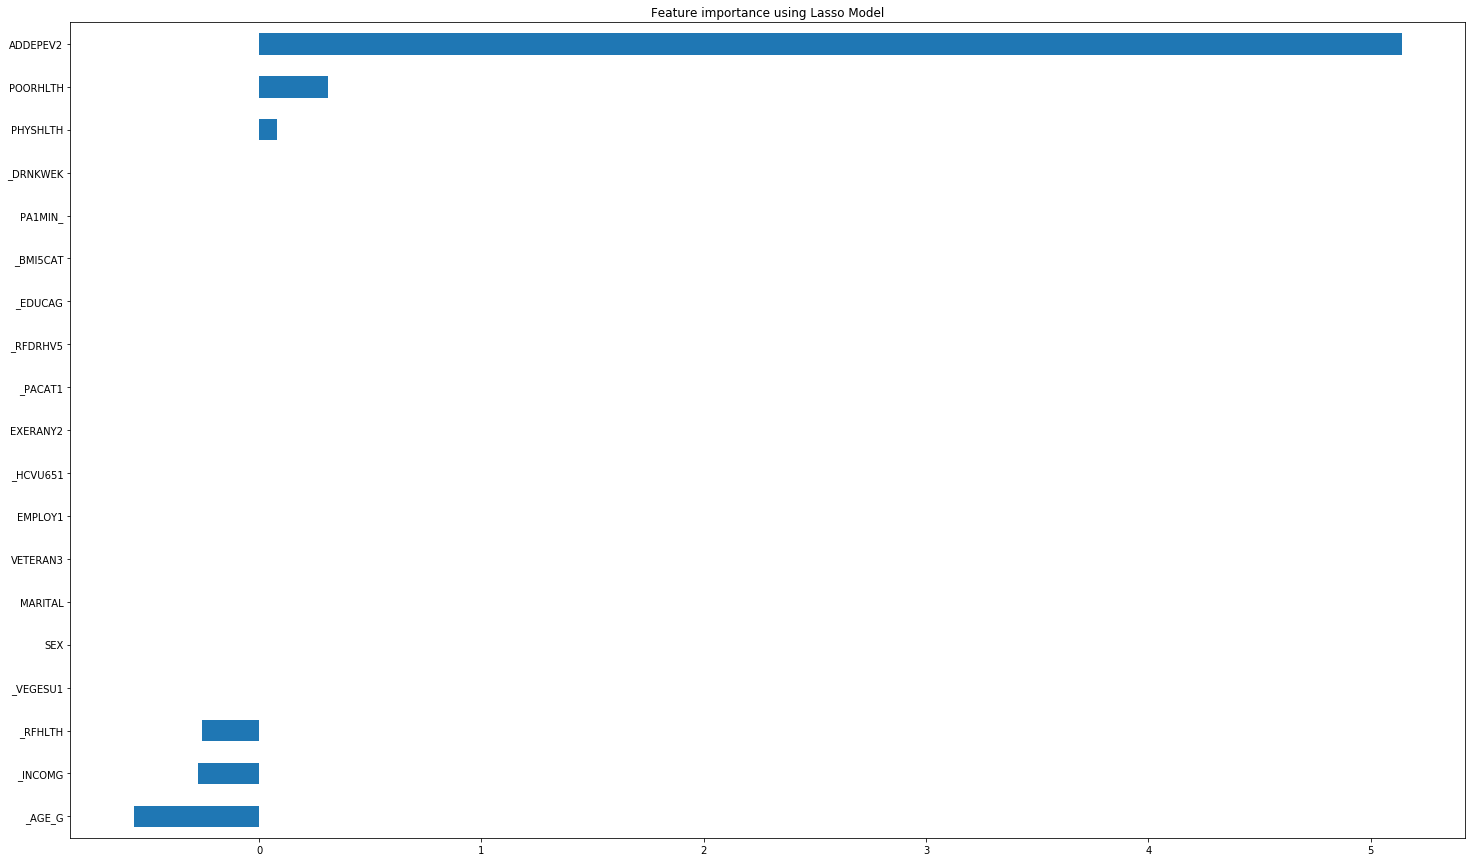

In [177]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (25.0, 15.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [178]:
LLCP2[['SEX', '_AGE_G', '_EDUCAG', '_INCOMG', '_RFDRHV5', 'EXERANY2',
       '_RFHLTH', '_HCVU651', 'EMPLOY1', 'VETERAN3', 'MARITAL', 'ADDEPEV2',
       'POORHLTH']].corr()

,SEX,_AGE_G,_EDUCAG,_INCOMG,_RFDRHV5,EXERANY2,_RFHLTH,_HCVU651,EMPLOY1,VETERAN3,MARITAL,ADDEPEV2,POORHLTH
SEX,1.000000,-0.074351,0.017429,0.090012,0.017686,0.038740,0.021441,-0.050380,0.136710,0.358836,0.074043,-0.115785,-0.032914
_AGE_G,-0.074351,1.000000,0.013690,-0.025433,-0.041522,-0.087881,-0.120966,0.217951,-0.505034,0.165744,0.101525,-0.042975,0.048511
_EDUCAG,0.017429,0.013690,1.000000,0.337425,0.014782,0.164491,0.180333,0.123050,0.130305,0.005906,0.155159,-0.059076,-0.100515
_INCOMG,0.090012,-0.025433,0.337425,1.000000,0.039942,0.159877,0.282103,0.154340,0.272339,0.046045,0.370661,-0.147633,-0.209355
_RFDRHV5,0.017686,-0.041522,0.014782,0.039942,1.000000,0.008446,0.028255,-0.022699,0.049424,0.000404,-0.015308,0.018252,-0.009279
EXERANY2,0.038740,-0.087881,0.164491,0.159877,0.008446,1.000000,0.211515,0.030995,0.098608,0.000366,0.063939,-0.083193,-0.170822
_RFHLTH,0.021441,-0.120966,0.180333,0.282103,0.028255,0.211515,1.000000,0.026729,0.246907,-0.022841,0.117071,-0.219051,-0.422461
_HCVU651,-0.050380,0.217951,0.123050,0.154340,-0.022699,0.030995,0.026729,1.000000,-0.084673,0.060873,0.085167,-0.008090,-0.001941
EMPLOY1,0.136710,-0.505034,0.130305,0.272339,0.049424,0.098608,0.246907,-0.084673,1.000000,-0.108056,0.068183,-0.095900,-0.217075
VETERAN3,0.358836,0.165744,0.005906,0.046045,0.000404,0.000366,-0.022841,0.060873,-0.108056,1.000000,0.062047,-0.029963,0.012112


In [214]:
X = LLCP2[['SEX', '_AGE_G', '_EDUCAG', '_INCOMG', '_RFDRHV5', 'EXERANY2',
       '_RFHLTH', '_HCVU651', 'EMPLOY1', 'VETERAN3', 'MARITAL', 'ADDEPEV2',
       'POORHLTH']].values

y = LLCP2['MENTHLTH2'].values

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [181]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [182]:
coeff_df = pd.DataFrame(regressor.coef_) 
coeff_df

,0
0,-0.443671
1,-0.569590
2,-0.206390
3,-0.193695
4,0.978335
5,-0.107641
6,-1.711569
7,-0.485089
8,0.104682
9,0.167703


In [183]:
y_pred = regressor.predict(X_test)

In [184]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
 
df.head(15)

,Actual,Predicted
0,0.0,3.576273
1,0.0,2.120437
2,14.0,11.943718
3,0.0,7.433194
4,0.0,1.853210
5,0.0,3.277559
6,0.0,0.453013
7,0.0,2.434294
8,3.0,2.990600
9,0.0,1.422688


In [185]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error-MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Square Error-RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Explained Variance Score:', regressor.score(X, y))
print('R Squared:', r2_score(y_test, y_pred))

Mean Absolute Error: 3.833075434567382
Mean Squared Error-MSE: 42.77949495988209
Root Mean Square Error-RMSE: 6.540603562354326
Explained Variance Score: 0.305726455537206
R Squared: 0.31073152276219185


In [215]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [216]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.76


In [217]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[84502  7788]
 [24372 18343]]


In [218]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.92      0.84     92290
         1.0       0.70      0.43      0.53     42715

   micro avg       0.76      0.76      0.76    135005
   macro avg       0.74      0.67      0.69    135005
weighted avg       0.75      0.76      0.74    135005



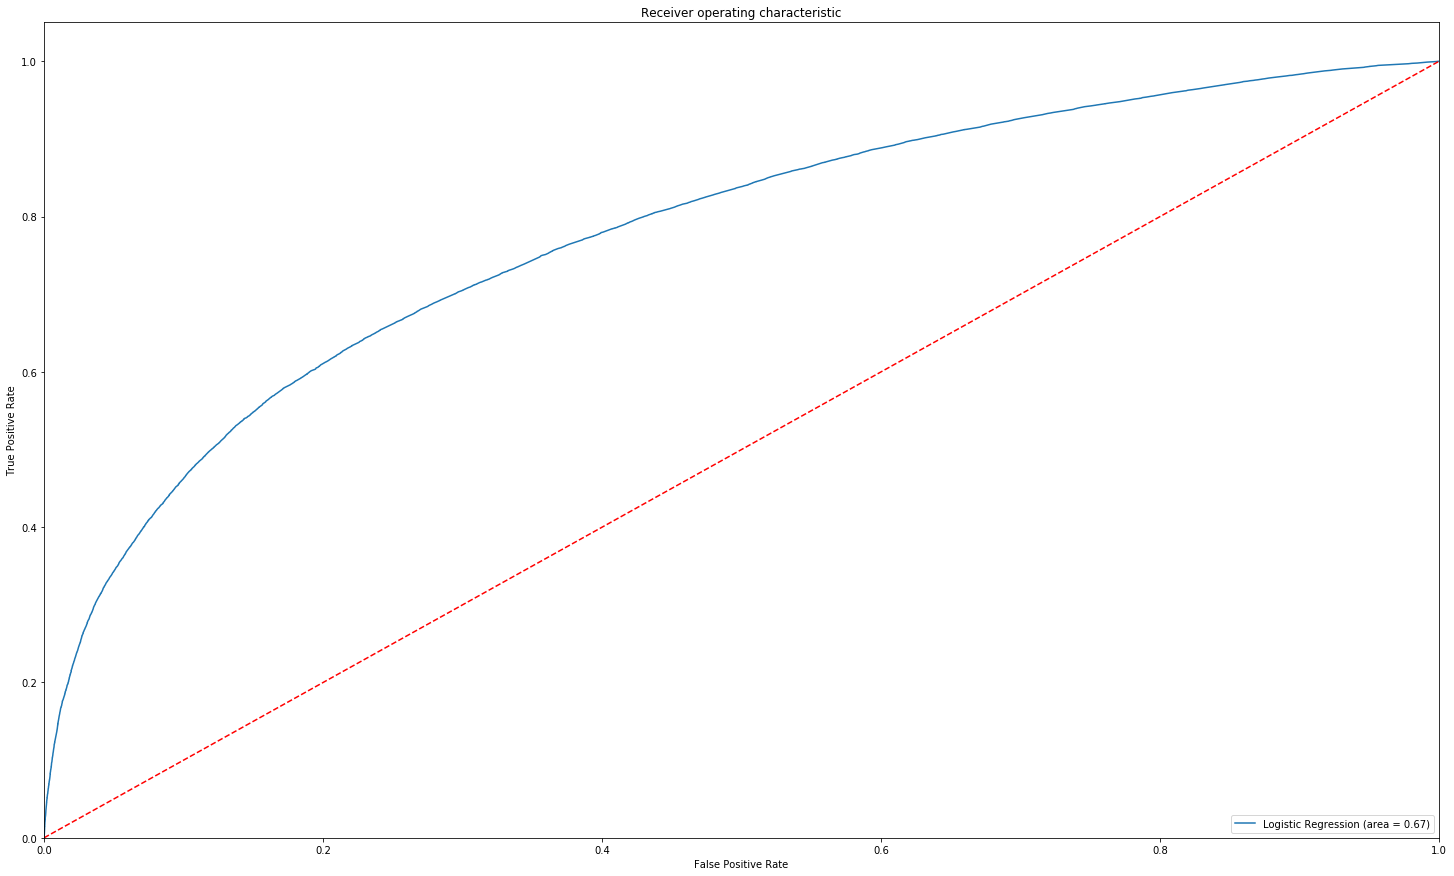

In [219]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()